In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
def load_df_from_xlsx(filepath):
    df = pd.read_excel(filepath)  # Reads the first sheet by default
    return df

In [3]:
ticker = 'NVDA'
df = load_df_from_xlsx('Data/Stocks/stockHistoryNvda.xlsx')
df

,symbol,date,open,high,low,close,pre_market,after_hours,volume,status
0,NVDA,2025-11-03,208.0800,211.3350,205.5600,206.8800,203.9900,206.6000,180159632,OK
1,NVDA,2025-10-31,206.4500,207.9700,202.0700,202.4900,205.8900,202.6200,179798344,OK
2,NVDA,2025-10-30,205.1500,206.1600,201.4100,202.8900,207.0400,204.5499,178859778,OK
3,NVDA,2025-10-29,207.9800,212.1899,204.7750,207.0400,206.0200,207.6500,308822352,OK
4,NVDA,2025-10-28,193.0500,203.1500,191.9100,201.0300,191.2000,204.4300,297970590,OK
...,...,...,...,...,...,...,...,...,...,...
1250,NVDA,2020-11-10,13.6065,13.6065,12.6283,12.7700,13.7000,12.7745,644067200,OK
1251,NVDA,2020-11-09,14.5525,14.6915,13.6108,13.6308,14.8255,13.7500,582977880,OK
1252,NVDA,2020-11-06,14.1098,14.5888,13.8950,14.5620,13.8500,14.5498,383348600,OK
1253,NVDA,2020-11-05,14.1625,14.3390,13.9910,14.1600,14.0028,13.9250,319028320,OK


In [4]:
def sort_df_by_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', ascending = True, inplace = True)
    df.reset_index(inplace = True)


In [5]:
sort_df_by_date(df)
df

,index,symbol,date,open,high,low,close,pre_market,after_hours,volume,status
0,1254,NVDA,2020-11-04,13.3893,13.8275,13.3369,13.7943,13.3875,13.8000,410229280,OK
1,1253,NVDA,2020-11-05,14.1625,14.3390,13.9910,14.1600,14.0028,13.9250,319028320,OK
2,1252,NVDA,2020-11-06,14.1098,14.5888,13.8950,14.5620,13.8500,14.5498,383348600,OK
3,1251,NVDA,2020-11-09,14.5525,14.6915,13.6108,13.6308,14.8255,13.7500,582977880,OK
4,1250,NVDA,2020-11-10,13.6065,13.6065,12.6283,12.7700,13.7000,12.7745,644067200,OK
...,...,...,...,...,...,...,...,...,...,...,...
1250,4,NVDA,2025-10-28,193.0500,203.1500,191.9100,201.0300,191.2000,204.4300,297970590,OK
1251,3,NVDA,2025-10-29,207.9800,212.1899,204.7750,207.0400,206.0200,207.6500,308822352,OK
1252,2,NVDA,2025-10-30,205.1500,206.1600,201.4100,202.8900,207.0400,204.5499,178859778,OK
1253,1,NVDA,2025-10-31,206.4500,207.9700,202.0700,202.4900,205.8900,202.6200,179798344,OK


In [6]:
def add_simple_moving_averages(df):
    df['SMA_5'] = df['close'].rolling(window=5).mean()
    df['SMA_100'] = df['close'].rolling(window=100).mean()
    return df

In [7]:
df = add_simple_moving_averages(df)
df

,index,symbol,date,open,high,low,close,pre_market,after_hours,volume,status,SMA_5,SMA_100
0,1254,NVDA,2020-11-04,13.3893,13.8275,13.3369,13.7943,13.3875,13.8000,410229280,OK,NaN,NaN
1,1253,NVDA,2020-11-05,14.1625,14.3390,13.9910,14.1600,14.0028,13.9250,319028320,OK,NaN,NaN
2,1252,NVDA,2020-11-06,14.1098,14.5888,13.8950,14.5620,13.8500,14.5498,383348600,OK,NaN,NaN
3,1251,NVDA,2020-11-09,14.5525,14.6915,13.6108,13.6308,14.8255,13.7500,582977880,OK,NaN,NaN
4,1250,NVDA,2020-11-10,13.6065,13.6065,12.6283,12.7700,13.7000,12.7745,644067200,OK,13.78342,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,4,NVDA,2025-10-28,193.0500,203.1500,191.9100,201.0300,191.2000,204.4300,297970590,OK,188.24400,172.2652
1251,3,NVDA,2025-10-29,207.9800,212.1899,204.7750,207.0400,206.0200,207.6500,308822352,OK,193.59600,172.9184
1252,2,NVDA,2025-10-30,205.1500,206.1600,201.4100,202.8900,207.0400,204.5499,178859778,OK,197.74200,173.5210
1253,1,NVDA,2025-10-31,206.4500,207.9700,202.0700,202.4900,205.8900,202.6200,179798344,OK,200.98800,174.1063


In [8]:
df = df.dropna()
df

,index,symbol,date,open,high,low,close,pre_market,after_hours,volume,status,SMA_5,SMA_100
99,1155,NVDA,2021-03-30,12.8420,12.9753,12.7050,12.8718,12.9000,12.8813,200202480,OK,12.76754,13.394653
100,1154,NVDA,2021-03-31,13.0155,13.4705,12.9825,13.3483,12.8625,13.3725,314777520,OK,12.90860,13.390193
101,1153,NVDA,2021-04-01,13.5723,13.8700,13.5113,13.8118,13.5263,13.8068,307962600,OK,13.16390,13.386711
102,1152,NVDA,2021-04-05,13.8675,14.0140,13.7330,13.9875,13.8250,14.0250,254131400,OK,13.39354,13.380966
103,1151,NVDA,2021-04-06,13.9997,14.0541,13.7736,13.8615,13.9750,13.8725,191745960,OK,13.57618,13.383273
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,4,NVDA,2025-10-28,193.0500,203.1500,191.9100,201.0300,191.2000,204.4300,297970590,OK,188.24400,172.265200
1251,3,NVDA,2025-10-29,207.9800,212.1899,204.7750,207.0400,206.0200,207.6500,308822352,OK,193.59600,172.918400
1252,2,NVDA,2025-10-30,205.1500,206.1600,201.4100,202.8900,207.0400,204.5499,178859778,OK,197.74200,173.521000
1253,1,NVDA,2025-10-31,206.4500,207.9700,202.0700,202.4900,205.8900,202.6200,179798344,OK,200.98800,174.106300


In [9]:
df.isnull().any()

index          False
symbol         False
date           False
open           False
high           False
low            False
close          False
pre_market     False
after_hours    False
volume         False
status         False
SMA_5          False
SMA_100        False
dtype: bool

In [10]:
def plot_column(df, column_name):
    plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w', edgecolor='k')
    plt.title(column_name, fontsize=30)
    plt.plot(df['date'], df[column_name])
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.show()

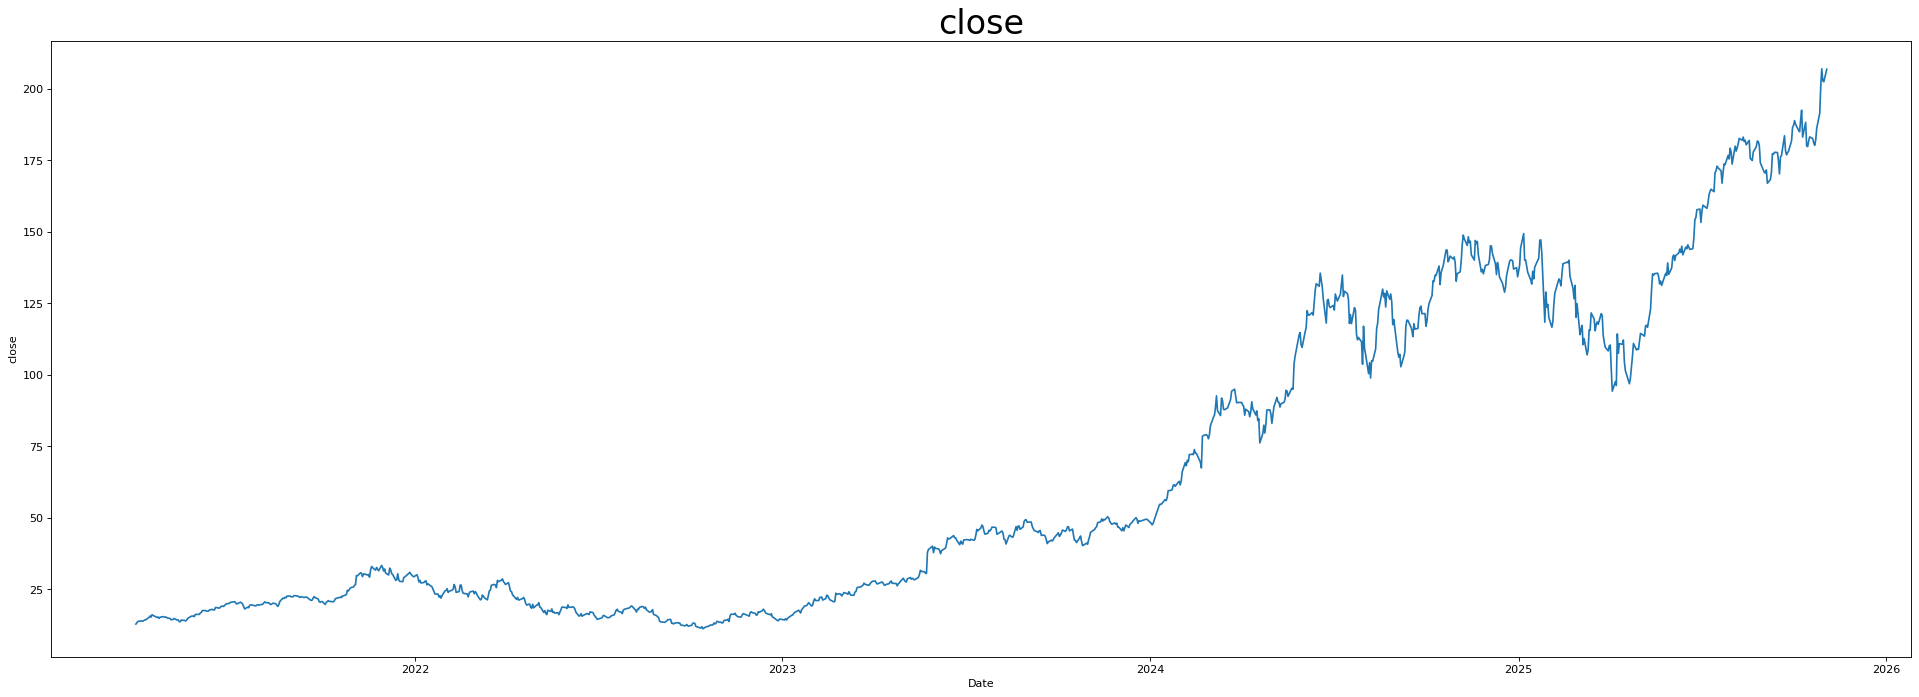

In [11]:
plot_column(df, 'close')

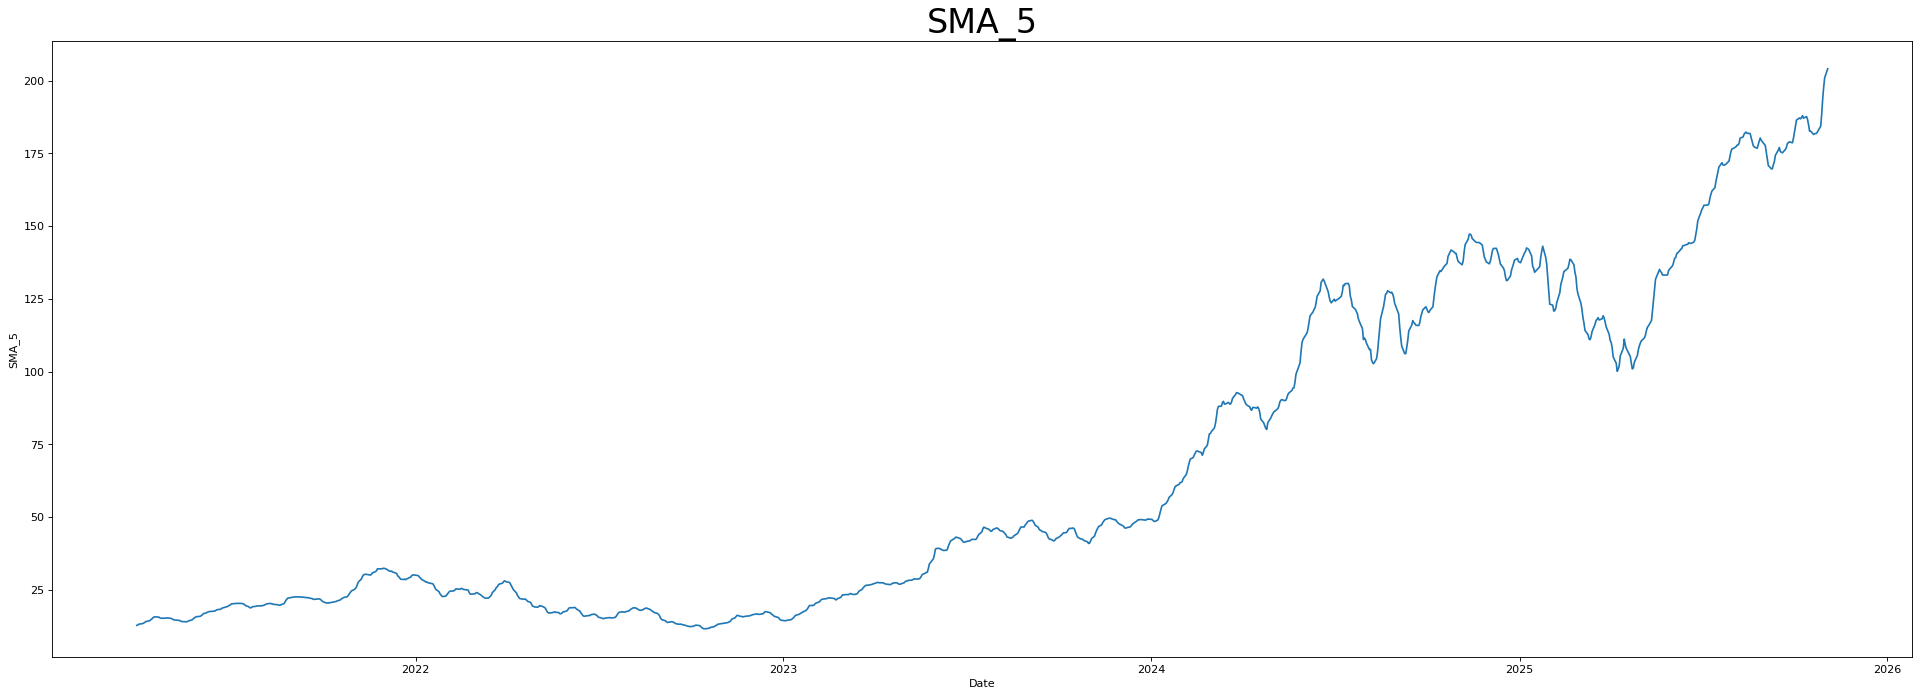

In [12]:
plot_column(df, 'SMA_5')

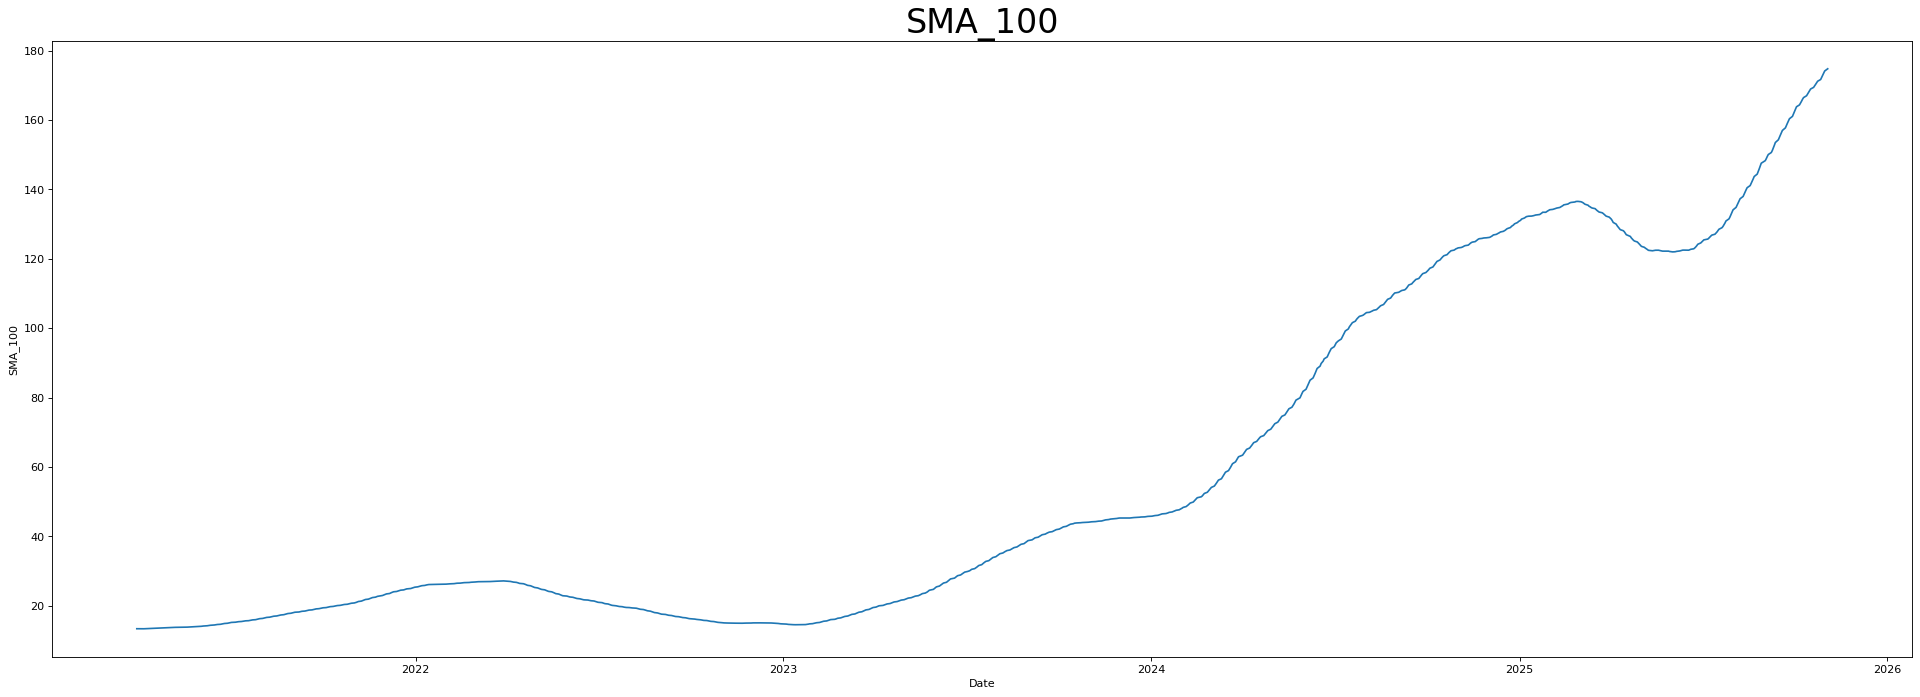

In [13]:
plot_column(df, 'SMA_100')

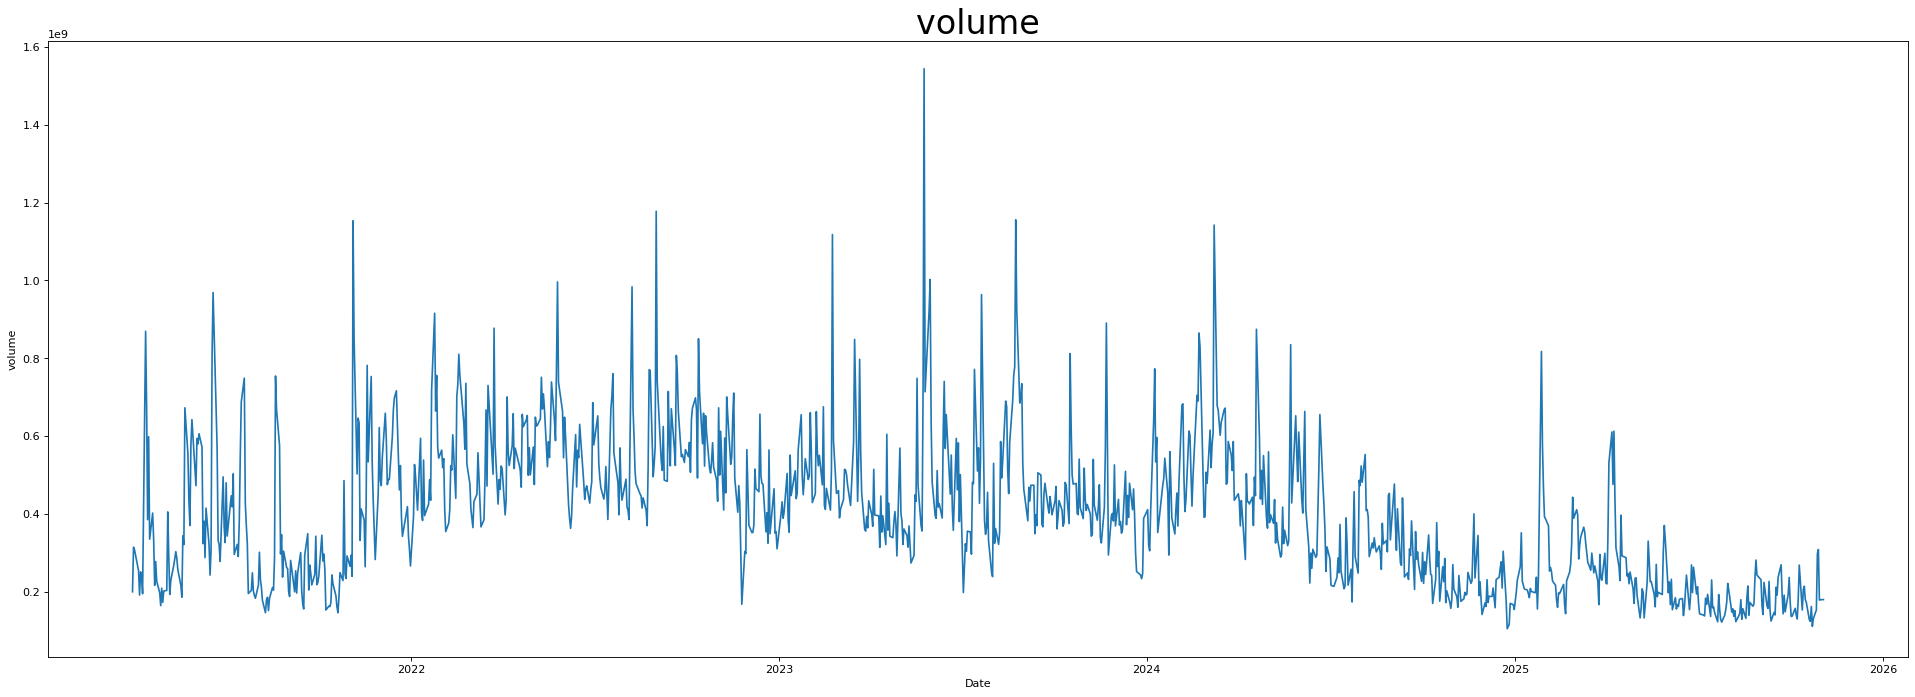

In [14]:
plot_column(df, 'volume')

In [15]:
features = ['open', 'high', 'low', 'close', 'volume', 'SMA_5']

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(),  
    'Decision Tree': DecisionTreeRegressor(),  
    'Random Forest': RandomForestRegressor() 
}

In [17]:
days_to_predict = 1
days_to_predict *= -1

df = df.copy()
df.loc[:, 'target'] = df['close'].shift(days_to_predict)
df

,index,symbol,date,open,high,low,close,pre_market,after_hours,volume,status,SMA_5,SMA_100,target
99,1155,NVDA,2021-03-30,12.8420,12.9753,12.7050,12.8718,12.9000,12.8813,200202480,OK,12.76754,13.394653,13.3483
100,1154,NVDA,2021-03-31,13.0155,13.4705,12.9825,13.3483,12.8625,13.3725,314777520,OK,12.90860,13.390193,13.8118
101,1153,NVDA,2021-04-01,13.5723,13.8700,13.5113,13.8118,13.5263,13.8068,307962600,OK,13.16390,13.386711,13.9875
102,1152,NVDA,2021-04-05,13.8675,14.0140,13.7330,13.9875,13.8250,14.0250,254131400,OK,13.39354,13.380966,13.8615
103,1151,NVDA,2021-04-06,13.9997,14.0541,13.7736,13.8615,13.9750,13.8725,191745960,OK,13.57618,13.383273,14.1435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,4,NVDA,2025-10-28,193.0500,203.1500,191.9100,201.0300,191.2000,204.4300,297970590,OK,188.24400,172.265200,207.0400
1251,3,NVDA,2025-10-29,207.9800,212.1899,204.7750,207.0400,206.0200,207.6500,308822352,OK,193.59600,172.918400,202.8900
1252,2,NVDA,2025-10-30,205.1500,206.1600,201.4100,202.8900,207.0400,204.5499,178859778,OK,197.74200,173.521000,202.4900
1253,1,NVDA,2025-10-31,206.4500,207.9700,202.0700,202.4900,205.8900,202.6200,179798344,OK,200.98800,174.106300,206.8800


In [18]:
df = df.dropna()

In [19]:
df.isnull().any()

index          False
symbol         False
date           False
open           False
high           False
low            False
close          False
pre_market     False
after_hours    False
volume         False
status         False
SMA_5          False
SMA_100        False
target         False
dtype: bool

In [20]:
# X is your input matrix
X = df[features]
X

,open,high,low,close,volume,SMA_5
99,12.8420,12.9753,12.7050,12.8718,200202480,12.76754
100,13.0155,13.4705,12.9825,13.3483,314777520,12.90860
101,13.5723,13.8700,13.5113,13.8118,307962600,13.16390
102,13.8675,14.0140,13.7330,13.9875,254131400,13.39354
103,13.9997,14.0541,13.7736,13.8615,191745960,13.57618
...,...,...,...,...,...,...
1249,189.9900,192.0000,188.4318,191.4900,153451565,184.27000
1250,193.0500,203.1500,191.9100,201.0300,297970590,188.24400
1251,207.9800,212.1899,204.7750,207.0400,308822352,193.59600
1252,205.1500,206.1600,201.4100,202.8900,178859778,197.74200


In [21]:
# y is your label
y = df['target']
y

99       13.3483
100      13.8118
101      13.9875
102      13.8615
103      14.1435
          ...   
1249    201.0300
1250    207.0400
1251    202.8900
1252    202.4900
1253    206.8800
Name: target, Length: 1155, dtype: float64

In [22]:
def train_and_predict(model, X_train, y_train, X_test, scaler):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return model, y_pred

In [43]:
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

In [24]:
def plot_actual_vs_pred(index, y_true, y_pred, model_name, date_range_str=None):
    plt.figure(figsize=(14, 6))
    plt.plot(index, y_true, label='Actual', linewidth=2)
    plt.plot(index, y_pred, label='Predicted', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Target Value')
    title = f"{ticker}: {model_name} Actual vs. Predicted"
    if date_range_str is not None:
        title = title + f' - Test Dates: {date_range_str}'
    plt.title(title)
    plt.legend()
    plt.show()

In [25]:
def evaluate_model(df, X, y, model_name, model, test_size=0.2, plot=True):
    split_idx = int(len(X) * (1 - test_size))
    test_dates = df['date'].iloc[split_idx:]
    date_min = pd.to_datetime(test_dates.min()).strftime('%Y-%m-%d')
    date_max = pd.to_datetime(test_dates.max()).strftime('%Y-%m-%d')
    date_range_str = f"{date_min} to {date_max}"

    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    scaler = StandardScaler() 
    fitted_model, y_pred = train_and_predict(model, X_train, y_train, X_test, scaler)

    metrics = compute_metrics(y_test, y_pred)

    results = {
        'metrics': metrics,
        'last_prediction': float(y_pred[-1]) if len(y_pred) > 0 else None,
        'predictions': y_pred,
        'scaler': scaler,
        'model': fitted_model
    }
    
    if plot:
        plot_actual_vs_pred(test_dates, y_test, y_pred, model_name, date_range_str)

    return results

In [26]:
test_size = 0.2
plotting = True

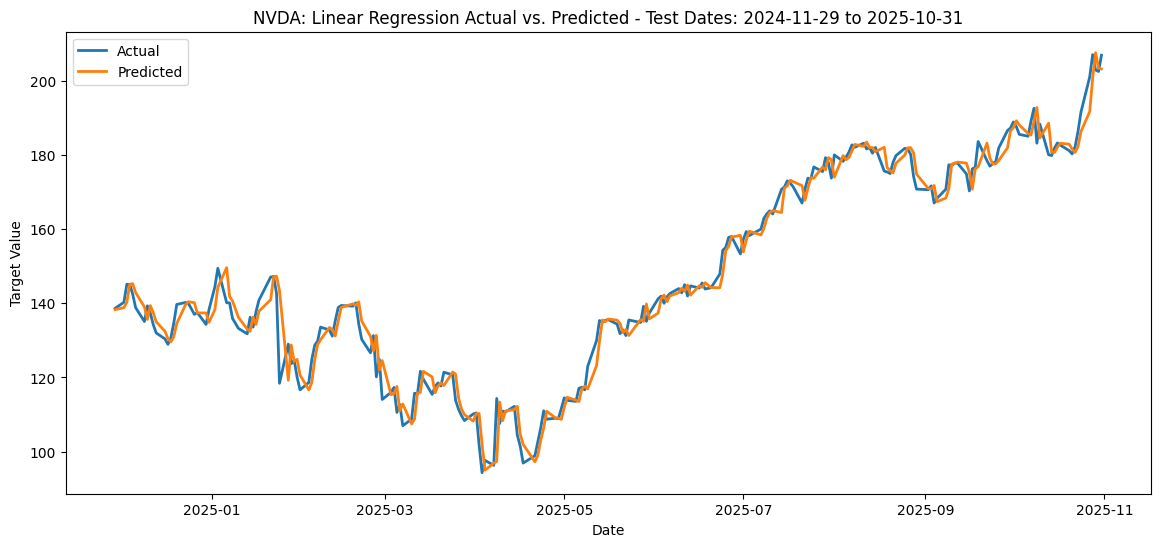

In [46]:
model_name = 'Linear Regression'
linear_regression_results = evaluate_model(df, X, y, model_name, models[model_name], test_size, plotting)

In [47]:
linear_regression_results['metrics']

{'mse': 17.198991903890818,
 'rmse': 4.14716673210649,
 'mae': 2.97924966881004,
 'r2': 0.9775981352885725}

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


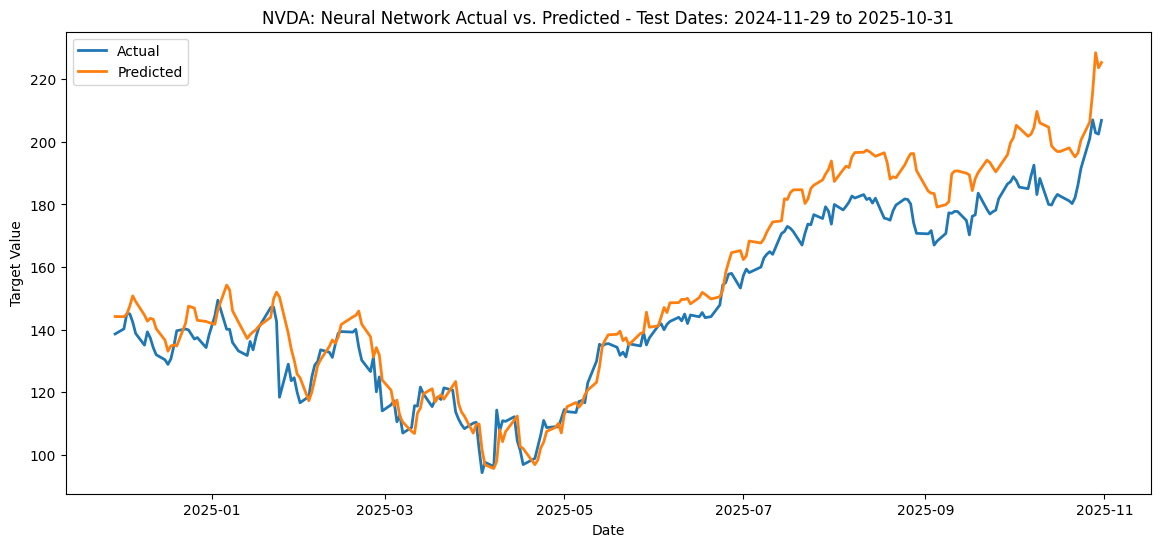

In [48]:
model_name = 'Neural Network'
neural_network_results = evaluate_model(df, X, y, model_name, models[model_name], test_size, plotting)

In [49]:
neural_network_results['metrics']

{'mse': 99.07162304203399,
 'rmse': 9.953472913613318,
 'mae': 8.023072540962493,
 'r2': 0.8709581870535619}

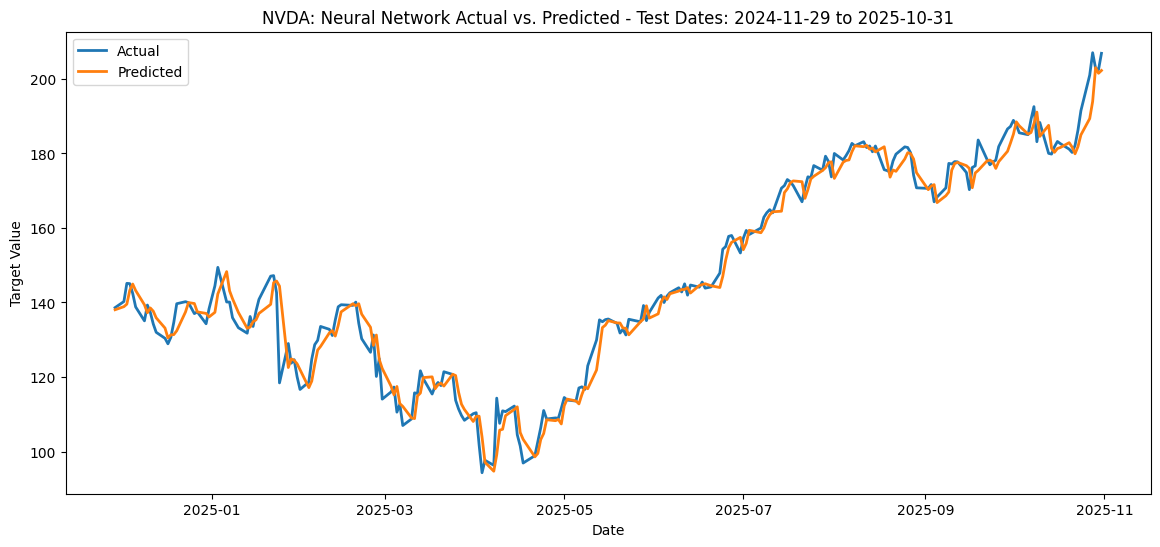

In [50]:
neural_network_results = evaluate_model(df, X, y, model_name, MLPRegressor(max_iter = 10000), test_size, plotting)

In [51]:
neural_network_results['metrics']

{'mse': 18.704723355591593,
 'rmse': 4.324895762396083,
 'mae': 3.1040063029311016,
 'r2': 0.9756369045105575}

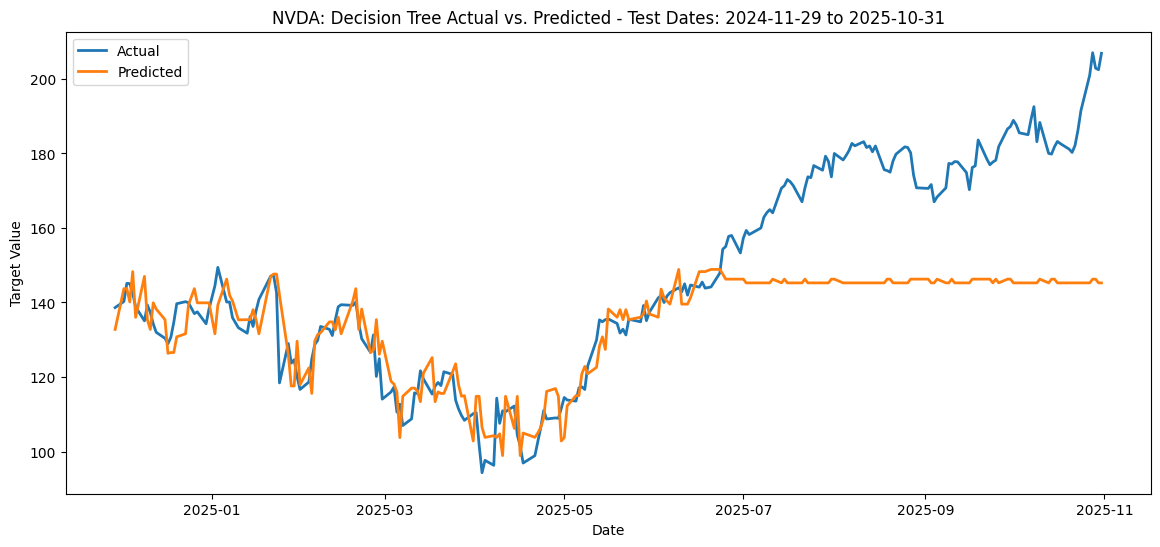

In [52]:
model_name = 'Decision Tree'
decision_tree_results = evaluate_model(df, X, y, model_name, models[model_name], test_size, plotting)

In [54]:
decision_tree_results['metrics']

{'mse': 471.54799564069265,
 'rmse': 21.715155897222857,
 'mae': 15.625588744588745,
 'r2': 0.3858038620916001}

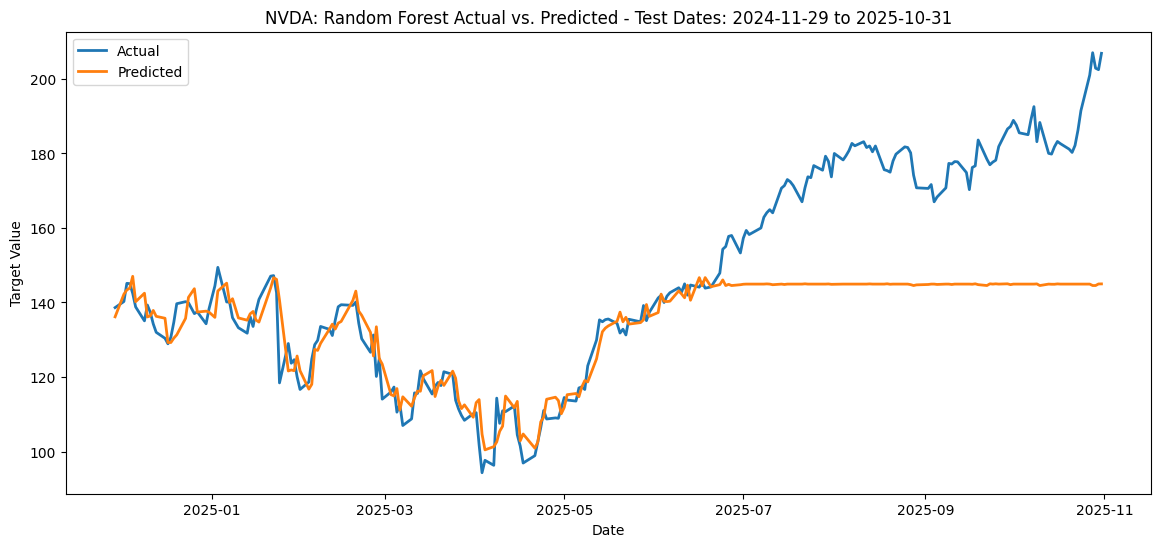

In [55]:
model_name = 'Random Forest'
random_forest_results = evaluate_model(df, X, y, model_name, models[model_name], test_size, plotting)

In [56]:
random_forest_results['metrics']

{'mse': 478.92739028409073,
 'rmse': 21.884409754071292,
 'mae': 15.048464718614694,
 'r2': 0.3761921243003731}

In [37]:
def plot_actual_vs_multiple_preds(index, y_true, preds_dict, date_range_str=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 6))
    plt.plot(index, y_true, label='Actual', linewidth=2)
    for name, y_pred in preds_dict.items():
        plt.plot(index, y_pred, label=f'Predicted: {name}', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Target Value')
    title = ticker + ": Actual vs. Multiple Predicted"
    if date_range_str is not None:
        title += f' - Test Dates: {date_range_str}'
    plt.title(title)
    plt.legend()
    plt.show()

In [38]:
preds_dict = {
    'Linear Regression': linear_regression_results['predictions'],
    'Neural Network': neural_network_results['predictions'],
    'Decision Tree': decision_tree_results['predictions'],
    'Random Forest': random_forest_results['predictions'],
}

In [39]:
split_idx = int(len(X) * (1 - test_size))
test_dates = df['date'].iloc[split_idx:]
date_min = pd.to_datetime(test_dates.min()).strftime('%Y-%m-%d')
date_max = pd.to_datetime(test_dates.max()).strftime('%Y-%m-%d')
date_range_str = f"{date_min} to {date_max}"
y_test = y.iloc[split_idx:]

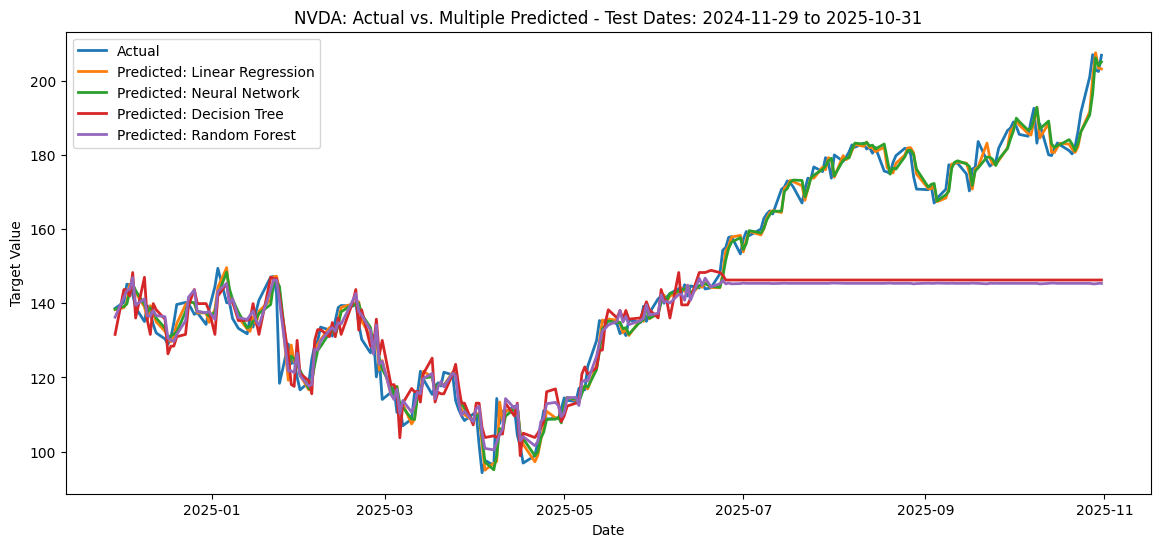

In [40]:
plot_actual_vs_multiple_preds(test_dates, y_test, preds_dict, date_range_str)